# Modulation Transfer Function and Contrast
- **Key terms**:
    - MTF
    - Convolutions
    
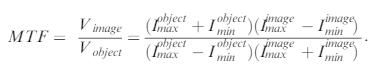


In [1]:
import numpy as np
from numpy import sin, cos, tan, arcsin, pi, sqrt

import matplotlib.pyplot as plt

from scipy.signal import convolve2d

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Spatial frequency and the modeulation transfer function (MTF)
- **Example 8.1**: Calculate the geometric MTF for a circular aperture using convolution

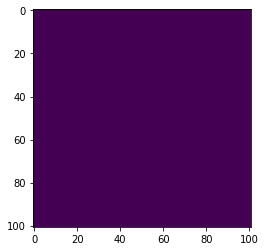

In [2]:
# parameters
m = 101
mapSpace = np.ones((m, m))
r = int(np.fix(m/2))

plt.imshow(mapSpace);

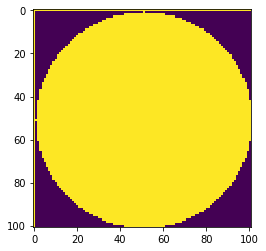

In [3]:
# set values outside radius to be 0

for x in range(-r, r):
    for y in range(-r, r):
        if (x**2 + y**2) >= (r**2 + 1):
            mapSpace[x+r+1, y+r+1] = 0

plt.imshow(mapSpace);

In [4]:
# convolution

mtf = convolve2d(mapSpace, mapSpace)
mtfMax = np.amax(mtf[:]) # max for normalization
mtfMax

7841.0

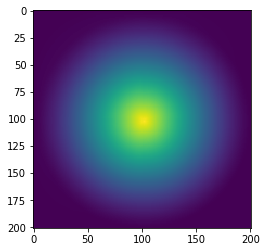

In [5]:
# visualize MTF

plt.imshow(mtf);

## Effect of annular optics on MTF
- **Example 8.2** Calculate the MTF and teh PSF using convolution on an annular aperture.

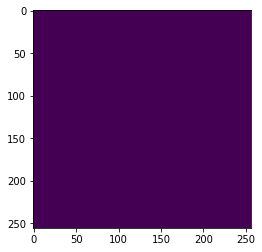

In [6]:
# parameters

m = 256
r_out = 100
r_in = 80
mapSpace = np.ones((m,m))
r = int(np.fix(m/2))

plt.imshow(mapSpace);

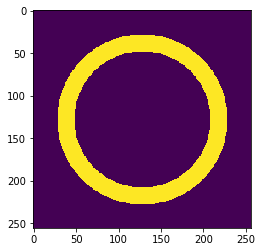

In [7]:
# set value outside radius to be 0

for x in range(-r, r):
    for y in range(-r, r):
        if (x**2 + y**2) >= (r_out**2):
            mapSpace[x+r, y+r] = 0
        if (x**2 + y**2) < (r_in**2):
            mapSpace[x+r, y+r] = 0

plt.imshow(mapSpace);

In [8]:
# MTF

mtf = convolve2d(mapSpace, mapSpace)

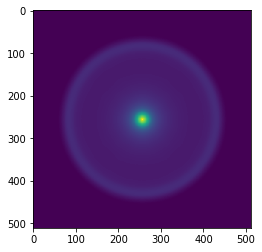

In [9]:
plt.imshow(mtf)

In [10]:
# PSF

mtf_fft = np.fft.fftshift(
            np.fft.fft2(
                np.fft.fftshift(
                    mtf
                )))
psf = mtf_fft.real**2 + mtf_fft.imag**2

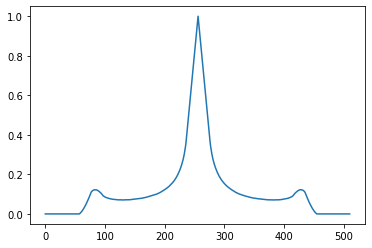

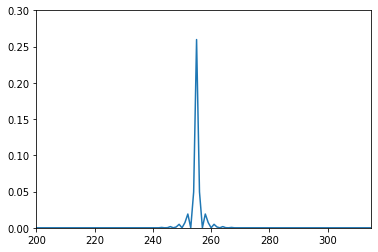

In [11]:
# plot MTF
plt.figure();
plt.plot(mtf[:,m]/np.amax(mtf[:]));
#plt.axis([1024-200, 1024+200, 0, 1.1]);


# plot PSF
plt.figure();
plt.plot(psf[:,m]/np.amax(psf[:]));
plt.axis([200, 315, 0, 0.3]);


## Image Transformations
- **Example 8.3**: Simulate an MTF on multiple spatial frequency line pairs.

In [12]:
# parameters

# image frame
MP = 128
CP = int(MP/2)
M = np.zeros((MP,MP))

# aperture width
w = 32
rouNd = 1

In [13]:
M.shape

(128, 128)

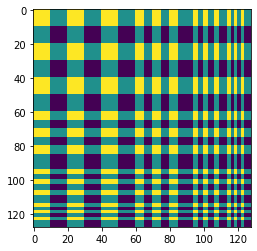

In [14]:
# set up spatial frequencies

M[:, 0:10] = 1;  M[:, 10:20] = 0;
M[:, 20:30] = 1; M[:, 30:39] = 0; 
M[:, 40:50] = 1; M[:, 50:59] = 0; 

M[:, 60:65] = 1; M[:, 65:70] = 0;
M[:, 70:75] = 1; M[:, 75:90] = 0; 
M[:, 80:85] = 1; M[:, 85:90] = 0; 

M[:, 94:97] = 1;   M[:, 97:79] = 0;
M[:, 100:103] = 1; M[:, 103:106] = 0; 
M[:, 106:109] = 1; M[:, 109:112] = 0; 

M[:, 114:116] = 1; M[:, 116:118] = 0; 
M[:, 118:120] = 1; M[:, 120:122] = 0; 
M[:, 122:124] = 1; M[:, 124:126] = 0; 

M = M*225
M = M + M.T    # make cross-hatch
plt.imshow(M);

In [15]:
# apply MTF

# round aperture
if rouNd == 1:
    N = np.zeros((MP,MP))
    for r in range(0, MP):
        for c in range(0, MP):
            distance = sqrt((r-CP)**2 + (c-CP)**2)
            N[r,c] = 1 - distance/w

            if N[r,c] < 0:
                N[r,c] = 0

# square aperture
else:
    N = np.zeros((MP,MP))
    N[CP-w-1:CP+w, CP-w-1:CP+w] = 1

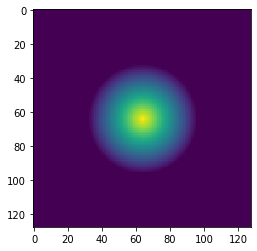

In [16]:
plt.imshow(N);

In [17]:
# apply MTF to image

M_fft_shift_conv = np.fft.fftshift(
                       np.fft.fft2(
                           M
                   )) * N*225

I_ifft = np.fft.fft2(
             np.fft.ifftshift(
                 M_fft_shift_conv
         ))
filtered = I_ifft * np.conj(I_ifft)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


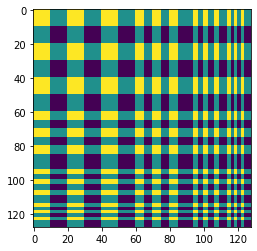

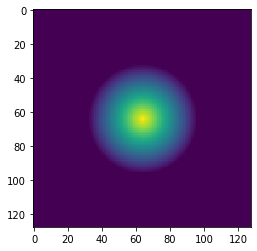

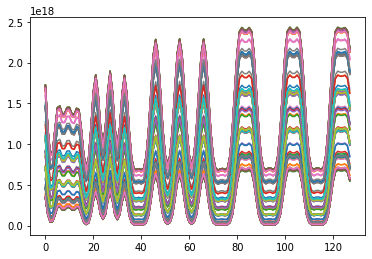

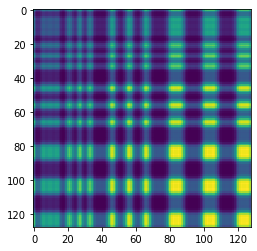

In [18]:
# visualize MTF

plt.figure();
plt.imshow(M);
plt.figure();
plt.imshow(N);
plt.figure();
plt.plot(filtered);
plt.figure()
plt.imshow(filtered.real);